In [1]:
import pandas as pd

from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import unique
from sklearn.cluster import KMeans

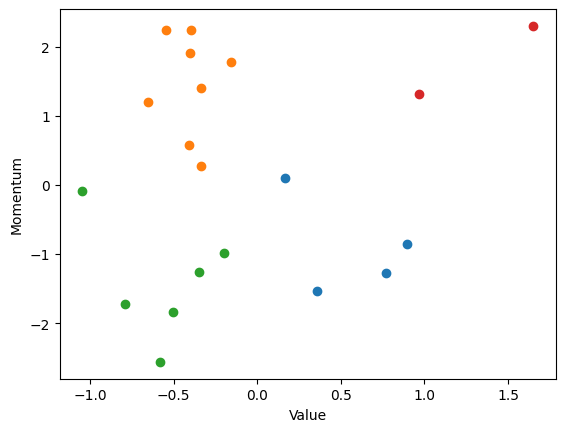

Stocks to Long includes: 
    Company_Name Stock_Symbol
0    Apple Inc          AAPL
19  Nvidia Corp         NVDA
Stocks to Short includes: 
           Company_Name Stock_Symbol
2       Amazon.com Inc         AMZN
5   Meta Platforms Inc         META
6            Tesla Inc         TSLA
7         Alphabet Inc        GOOGL
13         Netflix Inc         NFLX
16     T-Mobile US Inc         TMUS


In [2]:
# synthetic classification dataset
data = pd.read_excel('ML_Features.xlsx')
X = data.drop(['Company_Name','Stock_Symbol'], axis=1).to_numpy()

# k-means clustering
# define the model
# Set random seed for reproducibility
model = KMeans(n_clusters=4, random_state=100)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
  # get row indexes for samples with this cluster
  row_ix = where(yhat == cluster)
  # create scatter of these samples
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# show the plot
pyplot.xlabel('Value')
pyplot.ylabel('Momentum')
pyplot.show()

# print alerted entities
# print(data['Entity ID'].loc[yhat==3])
print('Stocks to Long includes: \n', data[['Company_Name', 'Stock_Symbol']].loc[yhat == 3])
print('Stocks to Short includes: \n', data[['Company_Name','Stock_Symbol']].loc[yhat == 2])